## Outline

1. **Import, save, info**
    - Создание DataFrame и Series
    - Чтение и сохранение из файла
    - Общая иформация о data set: df.head(), .tail(), .shape, .dtypes, .info(), .columns, .rename, .index
    - Измение в data set: (глобально) df.columns.name, .index.name, (локально) df.columns, .index, .astype()
    - Вызов DataFrame vs Series
    - Copy DataFrame
    
    
2. **Append, add and delete(drop)**
    - Add row (.append())
    - Add and crop columns (concate)
    - .insert() - add coluumn
    - Delete (.drop()) row (axis=0) and column(axis=1)
    
    
3. **Apply, map and replace**
    - .apply(), .applymap()
    - .map() and .replace()
    
    
4. **Selection and data cleaning**
    - df.to_numpy() перевести из DataFrame(one dtype per column n df) в np.array(only one dtype per array)
    - Slicing: simple (df[:]), .loc(), .iloc(), логический, точный (.at[], .iat[])
    - .filter()
    - .query()
    - Cleaning: .fillna()
    - .factorize
    
    
5. **Sort and analyse**
    - Сортировка: .unique(), .isin(), .sort_values(), .sort_index()
    - Analysis: .describe(), .min(max, mean), .count() и .value_counts()
    - Корреляция: df.corr()    
     
6. **Numpy** - для применения математки к pd.Series


---


**Источники:**  
1. [ODS course, 1 lect](https://habr.com/company/ods/blog/322626/)
2. [Докумендация к pandas (10 min)](https://pandas.pydata.org/pandas-docs/stable/10min.html)  
3. [Изучаем Pandas (книга)](https://drive.google.com/file/d/1EqUUrS81tAHwt_vghs9Hibksa5_GHecI/view)  
4. [NumPy, Scilear, pandas (книга/мануал/практика)](http://scipy-lectures.org/index.html)  



`help(anything)` тоже самое `anything?` - вызвать help

In [1]:
import pandas as pd
import numpy as np

## Import, save, info

#### 1 способ: с указанием индексов
```
pd.DataFrame([[list_of_1 raw], [list_of_2_raw], [list_of_3_raw]],
              index = ['Vasya', 'AK-47', 'Guf'],    ##len(index) = # of raws
              columns = ['Good', 'Bad']             #len(columns) = len([list_of_1 raw])
                 )
```

In [4]:
df=pd.DataFrame([['ssacd','asdasd'],['sgggg', 'dfgdf'], ['ddd', 'aaaa']],
                 index = ['Vasya', 'AK-47', 'Guf'],
                 columns = ['Good', 'Bad']
                 )
df

,Good,Bad
Vasya,ssacd,asdasd
AK-47,sgggg,dfgdf
Guf,ddd,aaaa


----

In [2]:
df = pd.DataFrame(np.array(([1,2,3], [4,5,6])),
                  index=['mouse', 'rabbit'],
                  columns=['one', 'two', 'three'])
df

,one,two,three
mouse,1,2,3
rabbit,4,5,6


**Name for all colunms, and indexs**

In [5]:
# глобальная подпись колонок и рядов
df.columns.name = 'new col name'
df.index.name = 'new index'
df

new col name,Good,Bad
new index,,
Vasya,ssacd,asdasd
AK-47,sgggg,dfgdf
Guf,ddd,aaaa


----

In [10]:
# локальная подпись колонок и рядов
df.columns = ['Basta', 'Guf', 'AK-47']
df

,Basta,Guf,AK-47
new index,,,
mouse,1,2,3
rabbit,4,5,6


#### 2 способ: по стобцово
```
frame_dict = {'Col1': ['list', 'of', 'values'], 'Col2': ['list', 'of', 'values']} 
pd.DataFrame(frame_dict)
```

In [8]:
dt=pd.DataFrame({'Sqrt': [x**2 for x in range(10)], 'XXX': ['a']*10})

In [38]:
dt.head()

,Sqrt,XXX
0,0,a
1,1,a
2,4,a
3,9,a
4,16,a


`pd.Series(data_list)` - column (из data_list) in DataFrame. Это стандартный class в pandas
`pd.DataFrame(dict)` где key - column name, value - data in *list*  
`df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))` - алтернативно можно задать значения [row1], [row2] и тд, а потом list columns. 

### Открыть файл

In [2]:
# main battlestation: C:\Users\Vlad\Documents\2019year\JupyterStash\ODS_mlcourse\github_ODS\data\telecom_churn.csv
# corvet battlestation: /home/vlad/Documents/2019year/JupyterStash/ODS_mlcourse/github_ODS/data/telecom_churn.csv
frame = pd.read_csv(r'/home/vlad/Documents/2019year/JupyterStash/ODS_mlcourse/github_ODS/data/telecom_churn.csv')

`pd.read_csv(очень много аргументов)` - см. [документацию](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) по аргументам. `sep='\t` - выбор разделения в документе  

### Описание таблицы

`pd.head(n)` - красивая колонка с перевыми n строками  
`pd.tail(n)` - ... с последними n строками   
`pd.shape` - выведет tuple c количеством (rows, columns)  
`pd.dtypes` - выведет типы столбцов  
`pd.info()` - развернутое info о dataset  
`pd.columns` - названия колонок    
`pd.index` - названия индексов строк   

In [17]:
frame.shape

(3333, 20)

In [3]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


### .colums

In [18]:
frame.columns #names of columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

#### .rename()

Переименование колонок. Явно указываем в словаре старое и новое имя:

In [ ]:
df.rename(columns = {
    'old_name1':'new_name1',
    'old_name3':'new_name2'
})

### .index

In [19]:
frame.index #names of rows

RangeIndex(start=0, stop=3333, step=1)

Можно поменять названия строк явное указав их имя:

In [ ]:
frame.index = ['MyCol1', 'MyCol2', 'MyCol3'] 

`frame.index.get_level_values(#)` - если индекс в несколько слоев (MultiIndex), то можно вернуть Series с названиями индексов.

In [20]:
print(type(frame.columns))
print(type(frame.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


### DataFrame vs Series calls

- `pd.Series` - это одна колонка.   
- `pd.DataFrame` - это таблица, т.е. коллекция колонок. Она состоить из `pd.Series`

In [24]:
frame.State.head() # вызов индивидуального стобцаи

0    KS
1    OH
2    NJ
3    OH
4    OK
Name: State, dtype: object

In [25]:
frame['State'].head(5) # альтернативный вызов колонки

0    KS
1    OH
2    NJ
3    OH
4    OK
Name: State, dtype: object

In [13]:
type(frame.Time)          #вызов как Series

pandas.core.series.Series

In [29]:
type(frame['State'])      #вызов как Series

pandas.core.series.Series

In [32]:
frame['State'].head(3)    #вызов как Series

0    KS
1    OH
2    NJ
Name: State, dtype: object

In [28]:
type(frame[['State']])     #вызов как DataFrame 

pandas.core.frame.DataFrame

In [30]:
frame[['State']].head(3)              #вызов как DataFrame

,State
0,KS
1,OH
2,NJ


In [33]:
frame[['State', 'Area code']].head(3)  # передает DataFrame из указанных колонок(указаных в list)

,State,Area code
0,KS,415
1,OH,415
2,NJ,415


### Save csv

In [89]:
dt.to_csv('dt.csv', sep=' ', header = True, index=None)

`to_csv(path_or_buf=None, sep=', ', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=None, date_format=None, doublequote=True, escapechar=None, decimal='.')` - [документация](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html)

Те сохраняет в ту папу, где ты сейчас (в той, откуда вызвал изначальный список)

In [100]:
!type C:\Trash\JupyterStash\dt.csv

Sqrt YYY
0 
1 ol
9 ololol
16 olololol
25 ololololol
36 olololololol
64 olololololololol
81 ololololololololol


----

### copy DataFrame

In [63]:
# copy DataFrame
# 1st way
new_frame = frame[:]

In [64]:
# 2nd way
new_frame = frame.copy()

## Append, add and delete (drop)

#### 1 способ: `df.append()`(новые строки) и конкетирование (новые стобцы)

**Add row**

In [61]:
new_line = {'Date': '2018-10-1', 'Transaction': '2', 'Item': 'whatever w/ tea'}

In [62]:
fr=fr.append(new_line, ignore_index=True) 

`pd.append(other, ignore_index=False, verify_integrity=False, sort=None)` - [документация](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html)  
`other` - присоединит *DataFrame or Series/dict-like object, or list of these*  
`ignore_index` - True: проигнорирует индексы в DataFrame и просиединит в конец. False: присоединит в соответствии с инддексами

In [63]:
fr.tail()  # NaN присвоится, если ничего не задано

,Date,Time,Transaction,Item
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry
21292,2017-04-09,15:04:24,9684,Smoothies
21293,2018-10-1,NaN,2,whatever w/ tea


**Add column**

In [39]:
new_col = ['ol'*x for x in range(10)]
dt['YYY']=new_col
dt.head()

,Sqrt,XXX,YYY
0,0,a,
1,1,a,ol
2,4,a,olol
3,9,a,ololol
4,16,a,olololol


To add new column call ```dt['name'] = column```, здесь значение для column в list

---

Таким образом можно "вырезать" столбцы и создавать новые DataFrame

In [41]:
new_dt = dt[['Sqrt'] + ['YYY']] # те из стобцов Sqrt, XXX и YYY, мы вырезали Sqrt и YYY  
new_dt.head()

,Sqrt,YYY
0,0,
1,1,ol
2,4,olol
3,9,ololol
4,16,olololol


#### 2 способ: `df.insert()`

In [34]:
frame.insert(loc=(len(frame.columns)-1), column='Whats up', value=[i*2 for i in range(len(frame))])

Вставляем колонку 'Whats up' со значениями `value` как предпоследнюю колонку `(len(frame.columns)-1)`

In [42]:
frame.loc[0:3,'Total intl calls':]  # срез последних нескольких стобцов

,Total intl calls,Total intl charge,Customer service calls,Whats up,Churn
0,3,2.70,1,0,False
1,3,3.70,1,2,False
2,5,3.29,0,4,False
3,7,1.78,2,6,False


```frame.insert(loc, column, value)``` - другой способ   
`loc=` -  указываешь # индекс куда встравить (колонка)  
`column` - имя столбца  
`value` - Series, array, list - колонка которую вствить  

#### Delete

In [44]:
dt.drop([2,7], axis=0, inplace = True)    # axis = 0   -  rows

In [43]:
dt.drop('XXX', axis=1, inplace = True)    # axis = 1   -  columns

In [46]:
dt.head(3)                               # row 2 (and 7) and column XXX were deleted

,Sqrt,YYY
0,0,
1,1,ol
3,9,ololol


`DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')` - [документация](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)  
`label` - list of targets(либо индексы ряда/рядов, либо названия столбца/столбцов для удаления)  
`axis` - 0: for indexes (rows), 1: for columns.  
`inpalce` - True: перепишет dataframe, False: только выведет результат, не перепишет  
`index` & `columns` - альтернативная задача таргета (labels, axis=1 is equivalent to columns=labels)

## Apply, map and replace

#### Apply
**Apply** - применяет функцию ко всем столбцам(дефолт) или строкам 

**Пример 1**

In [6]:
other_frame.Date=frame.Date.apply(pd.to_datetime)  #datetime - это NumPy объекты нужун для удобной работы со временем

In [21]:
other_frame.Time.head(5)

0   2018-11-22 09:58:11
1   2018-11-22 10:05:34
2   2018-11-22 10:05:34
3   2018-11-22 10:07:57
4   2018-11-22 10:07:57
Name: Time, dtype: datetime64[ns]

`pd.apply(func, axis=0, broadcast=False, raw=False, reduce=None, args=(), **kwds)` - [документ](https://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.apply.html)  
`axis=0` = apply to index, те к каждой колонке (default)  
`axis=1` = apply to row, те к каждый строке 

**Пример 2**

In [48]:
frame.apply(np.max) 

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes           20
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Whats up                   6664
Churn                      True
dtype: object

**Пример 3**  
Вывести инфо про все штаты, начинающиеся с W.

In [53]:
frame[frame['State'].apply(lambda State: State[0] == 'W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Whats up,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,...,18.87,326.4,97,14.69,11.2,5,3.02,0,18,False
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,...,16.24,182.7,115,8.22,9.5,3,2.57,0,52,False
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,...,19.19,265.3,86,11.94,3.5,3,0.95,1,88,False
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,...,18.46,70.6,79,3.18,11.0,3,2.97,1,98,False
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,...,18.67,203.9,127,9.18,9.7,3,2.62,5,108,True


Объяснение: `frame['State'].apply(lambda State: State[0] == 'W')` возвращает Series, в котором True or False соответствуют lambda function (т.е. все штаты начинающиеся с W). Далее, основной frame вызывается через bool (т.е. `df[df['Smth'] == 0]` - логический срез по всем удовлетворяющим bool). Тогда `frame[Series(bool)]` вернет только те результаты, для которых bool - True.  

In [57]:
type(frame['State'].apply(lambda State: State[0] == 'W'))

pandas.core.series.Series

In [56]:
frame['State'].apply(lambda State: State[0] == 'W').head()

0    False
1    False
2    False
3    False
4    False
Name: State, dtype: bool

#### .applymap

Summing up, `apply` works on a row / column basis of a DataFrame, `applymap` works element-wise on a DataFrame, and `map` works element-wise on a Series.

#### Map and replace
**map** - заменяет old_value на new_value, переданные в функцию, **replace** - то же самое, только чуть другой синтаксис

In [58]:
new_items={'Yes': True , 'No' : False}
frame['International plan']=frame['International plan'].map(new_items) 
# Заменит все Bread в столбце Item на WOW BREAD

In [60]:
frame['International plan'].head(3)

0    False
1    False
2    False
Name: International plan, dtype: bool

`pd.map(arg, na_action=None)` - заменяет все значения заданые в `arg`по принципу `dict={old_value: new_value}`  
`arg`- function, dict, or Series.  
**правда, если в dict не указаны new_values для old_value, то их заменит на NaN** - т.е. если я не учел все old_values, то вместо них будет NaN. Поэтому иногда лучше испльзовать `.replace()`

**None = NaN** когда хочешь убрать NaN values use `pd.replace({None : 0(or whatever)})`

In [63]:
frame['State'].replace({'KS': 'Kansas'}).head()   # ничего не будет потеряно как в случаии с .map({old_value: new_value})

0    Kansas
1        OH
2        NJ
3        OH
4        OK
Name: State, dtype: object

`replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')` - [док](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html)  
`to_replace : str, regex, list, dict, Series, int, float, or None` - тут передали dict  
Аналогично `pd.map`.

## Selection and cleaning

### DataFrame to Numpy array

Есть опция перевести DataFrame в NumPy: 
[Документация](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy)  
`df.to_numpy()`  
**NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column**  

Тогда можно будет использовать все прелести Numpy такие как операции над матрицами и линал. Например:
`df.to_numpy().T` - Transposing data

### Slicing 

**Simple (по строкам)**

In [64]:
frame[:3]   # первые 3 строки

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Whats up,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,False
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,2,False
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,4,False


In [65]:
frame[-3:]  # последние 3 строки (3 с конца)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Whats up,Churn
3330,RI,28,510,False,No,0,180.8,109,30.74,288.8,...,24.55,191.9,91,8.64,14.1,6,3.81,2,6660,False
3331,CT,184,510,True,No,0,213.8,105,36.35,159.6,...,13.57,139.2,137,6.26,5.0,10,1.35,2,6662,False
3332,TN,74,415,False,Yes,25,234.4,113,39.85,265.9,...,22.60,241.4,77,10.86,13.7,4,3.70,0,6664,False


#### .loc() и .iloc()

- `.loc()` - по именам (location)
- `.iloc()` - по номерам (integer location)

**.loc()**

Если индексы именные:

In [ ]:
frame.loc[['row1', 'row3', 'row8'], ['Date' , 'Time']]

В случаии, если индексы не именные, а int, то названия индексов можно указывать цифрами:

In [6]:
frame.loc[[2,4,7], ['Date' , 'Time']]  

,Date,Time
2,2016-10-30,10:05:34
4,2016-10-30,10:07:57
7,2016-10-30,10:13:03


`frame.loc[0:5, 'Date':'Time']` - выведет срез  
`frame.loc[[2,4,7], ['Date' , 'Time']]` - выдаст указанные строки и столбцы

Отбор по булевому столбцу (т.е. `pd.Series`):

In [ ]:
df.loc[df['Survived'] == 1] # то же самое, что и df[df['Survived'] == 1]

In [ ]:
my_stat.loc[my_stat['n_users'] < 0, 'n_users'] = mid #замена всех отрицательных значений в колонке n_users на mid

**.iloc()**

In [ ]:
frame.iloc[2,4,7] # вернет только строки 3, 5, 8 (считая от 0) и все столбцы

In [ ]:
frame.iloc[[2,4,7], 0:2] # вернет только строки 3, 5, 8 (считая от 0) и 0:2 стобцы

In [7]:
frame.iloc[[2,4,7], [0,2]] # вернет только строки 3, 5, 8 (считая от 0) и 0:2 стобцы

,Date,Transaction
2,2016-10-30,2
4,2016-10-30,3
7,2016-10-30,5


`pd.loc[[list_row indexes], [list_column names]]` - делает вырез из DataFrame  
`pd.iloc[[list_row indexes], [list_column indexes]]` - аналогично, но columns задаются индексами, а не именем  
`pd.ix[]` - объединяет iloc и loc, **но его упразднят в будущих версия**

**Логический срез**  
В логие может быть сколь угодно и/или:   `(...) & (...) | (...)`

In [79]:
frame[frame['State'] == 'KS'].head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Whats up,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,False
179,KS,70,408,False,No,0,232.1,122,39.46,292.3,...,24.85,201.2,112,9.05,0.0,0,0.00,3,358,False
258,KS,92,408,True,No,0,62.6,111,10.64,180.6,...,15.35,221.7,80,9.98,10.4,2,2.81,1,516,True
287,KS,137,408,False,No,0,205.9,88,35.00,209.3,...,17.79,289.9,84,13.05,14.5,4,3.92,2,574,False
368,KS,132,415,False,No,0,83.4,110,14.18,232.2,...,19.74,146.7,114,6.60,7.6,5,2.05,1,736,False


**df.at**  

`frame.at[index(row) name(or #), 'column name']` - выводит значение 1го указаного элемента (по названиям)   
`frame.iat[# of index(row), # of column]` - тоже самое, но по позиции (номерам)

In [80]:
frame.at[2,'State']

'NJ'

Так же можно использовать для точечного изменения

In [81]:
frame.at[2,'State'] = 'My State'
print(frame.at[2,'State'])

My State


In [85]:
frame.iat[2, 0]                     # column 'State' was called using its number (0)

'My State'

### .filter()

`frame.filter(items=None, like=None, regex=None, axis=None)`

Subset rows or columns of dataframe according to labels in the specified index. Note that this routine does not filter a dataframe on its contents. The filter is applied to the labels of the index.  

- `axis = 0` - row (index). `axis = 1` - columns (default)
- `item = ['name']` - list of full names search
- `like = 'am'` - part name search (takes string)

- `regex` - отбор по условию (некоторому выражению). Format - str

In [74]:
frame.filter(items=['Total night minutes', 'Total eve charge']).head(3)       # ищет полное совпадение

,Total night minutes,Total eve charge
0,244.7,16.78
1,254.4,16.62
2,162.6,10.30


In [76]:
frame.filter(like='night').head(3)                                           # ищет частичное совпадение

,Total night minutes,Total night calls,Total night charge
0,244.7,91,11.01
1,254.4,103,11.45
2,162.6,104,7.32


### .query()

`df.query('...')` - позволяет делать логический отбор значений заданный одной строкой. Например:
```python
frame[(frame['writing'] > 78)]
```
будет эквивалентно:
```python
frame.query('writing > 78')
```

In [ ]:
 rame.query("writing > 78 & gender = 'female'") # 'female' - это строковый тип, поэтому надо взять в ''

будет эквивалетно

In [ ]:
frame[(frame['writing'] > 78) & (frame['gender'] == 'female')]

#### экранирование @

Экранирование позволяет добавлять в строку переменную. В этом случаии, перед переменной ставиться `@` - символ экранирования. Например:

In [ ]:
mean_score = frame['writing'].mean()
 rame.query("gender = 'female' & writing > @mean_score") # внимание на @mean_score

будет эквивалетно

In [ ]:
mean_score = frame['writing'].mean()
frame[(frame['writing'] > mean_score) & (frame['gender'] == 'female')]

### Cleaning

**df.fillna**  
Заменяет все NaN на что-нибудь

In [29]:
frame.fillna('aoaoa', inplace=True)   #заменит NaN на 'aoaoa'

In [9]:
frame['Transaction']=frame['Transaction'].astype('int64')  #меняет тип колонки

#### .factorize 
Возвращает уникальные элементы в Series и приписывает им номера(только уникальным) в соответсвии с порядком.   
`pd.factorize(values, sort=False, order=None, na_sentinel=-1, size_hint=None)` 
- It assigns labels to values in provided array (Series)
- Returns: (array of labels, idex(original array)
- Label 0 is assigned to 1st value in index array

In [88]:
labels, uniques = pd.factorize(['b', 'b', 'a', 'vlad', 'c', 123, 'b'])
print(labels)
print(uniques)

[0 0 1 2 3 4 0]
['b' 'a' 'vlad' 'c' '123']


In [90]:
test_frame = pd.Series(['b', 'b', 'a', 'vlad', 'c', 123, 'b'])
labels, uniques = test_frame.factorize(['b', 'b', 'a', 'vlad', 'c', 123, 'b'])
print(labels)
print(uniques)

[2 2 1 4 3 0 2]
Index([123, 'a', 'b', 'c', 'vlad'], dtype='object')


## Sort and analyse

#### Сортировка

**.unique**

In [104]:
# ищет уникальные объекты в столбце (возвращает numpy.ndarray)
frame['Area code'].unique()

array([415, 408, 510], dtype=int64)

In [105]:
print(frame['State'].unique())

['KS' 'OH' 'My State' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT'
 'NY' 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH'
 'GA' 'AK' 'NJ' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC'
 'WA' 'NM' 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


**.isin**

```frame.isin(iterable, Series, DataFrame or dictionary)``` - проверяет если в DataFrame есть объекты из (...) и возвращает булевый DataFrame[True, False]. Если его всунуть в `frame[frame['State'].isin(lis)]` то выведет только строки с объектами из list, т.к. первый `frame[...]` автоматом проверяет булевость

In [106]:
lis=['OH', 'NC']
frame[frame['State'].isin(lis)].head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Whats up,Churn
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,2,False
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,6,False
64,NC,38,408,False,No,0,131.2,98,22.30,162.9,...,13.85,159.0,106,7.15,8.2,6,2.21,2,128,False
152,OH,65,408,False,No,0,187.9,116,31.94,157.6,...,13.40,227.3,86,10.23,7.5,6,2.03,1,304,False
156,OH,83,415,False,No,0,337.4,120,57.36,227.4,...,19.33,153.9,114,6.93,15.8,7,4.27,0,312,True


**.sort_values**

In [108]:
frame.sort_values(by='Total night minutes', ascending='False').head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Whats up,Churn
1260,AK,76,415,False,Yes,22,160.1,107,27.22,168.7,...,14.34,23.2,102,1.04,9.5,4,2.57,3,2520,False
1113,IA,152,415,False,No,0,206.3,98,35.07,292.8,...,24.89,43.7,121,1.97,10.6,4,2.86,1,2226,False
883,WY,42,408,False,No,0,146.3,84,24.87,255.9,...,21.75,45.0,117,2.03,8.0,12,2.16,1,1766,False
3247,OK,146,510,False,No,0,138.4,104,23.53,158.9,...,13.51,47.4,73,2.13,3.9,9,1.05,4,6494,True
2756,KS,123,415,False,No,0,140.0,106,23.80,153.7,...,13.06,50.1,87,2.25,12.5,1,3.38,2,5512,False


In [122]:
frame.sort_values(by=['Total intl minutes', 'Total day minutes'], ascending=['True', 'False']).head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Whats up,Churn
343,IN,98,408,False,Yes,21,64.6,98,10.98,176.1,...,14.97,244.8,84,11.02,0.0,0,0.0,2,686,False
2513,NY,86,510,False,No,0,70.7,125,12.02,211.0,...,17.94,174.6,107,7.86,0.0,0,0.0,2,5026,False
1564,VT,137,510,False,No,0,97.5,95,16.58,195.8,...,16.64,288.8,78,13.00,0.0,0,0.0,1,3128,False
3290,CA,127,510,False,No,0,107.9,128,18.34,187.0,...,15.90,218.5,95,9.83,0.0,0,0.0,0,6580,False
712,MO,106,415,False,No,0,114.4,104,19.45,78.3,...,6.66,232.7,78,10.47,0.0,0,0.0,2,1424,False


`sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')` - [документ](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html). Сортирует "последовательно" идя по `by=[list]` т.е. сперва по 1ому, потом по 2му (если это не противоречит 1му) и т.д.    
`ascending` - по-возрастанию  

---

**.sort_index**

In [126]:
#sort by the titles of rows or columns
frame.sort_index(axis=1, ascending=True).head(3) #axis = 0 - row(index), axis = 1 columns

,Account length,Area code,Churn,Customer service calls,International plan,Number vmail messages,State,Total day calls,Total day charge,Total day minutes,...,Total eve charge,Total eve minutes,Total intl calls,Total intl charge,Total intl minutes,Total night calls,Total night charge,Total night minutes,Voice mail plan,Whats up
0,128,415,False,1,False,25,KS,110,45.07,265.1,...,16.78,197.4,3,2.70,10.0,91,11.01,244.7,Yes,0
1,107,415,False,1,False,26,OH,123,27.47,161.6,...,16.62,195.5,3,3.70,13.7,103,11.45,254.4,Yes,2
2,137,415,False,0,False,0,My State,114,41.38,243.4,...,10.30,121.2,5,3.29,12.2,104,7.32,162.6,No,4


In [127]:
frame.sort_index(axis=0, ascending=False).head(3) #axis = 0 - row(index), axis = 1 columns

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Whats up,Churn
3332,TN,74,415,False,Yes,25,234.4,113,39.85,265.9,...,22.60,241.4,77,10.86,13.7,4,3.70,0,6664,False
3331,CT,184,510,True,No,0,213.8,105,36.35,159.6,...,13.57,139.2,137,6.26,5.0,10,1.35,2,6662,False
3330,RI,28,510,False,No,0,180.8,109,30.74,288.8,...,24.55,191.9,91,8.64,14.1,6,3.81,2,6660,False


### Analysis

**df.describe**

In [96]:
frame.describe()                                 # by default gives statistics only for columns with numerical dtypes

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Whats up
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,3332.000000
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,1924.597101
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,1666.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,3332.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,4998.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,6664.000000


In [97]:
frame.describe(include=['object', 'int64'])     # can directly tell what types to consider

,State,Account length,Area code,Voice mail plan,Number vmail messages,Total day calls,Total eve calls,Total night calls,Total intl calls,Customer service calls,Whats up
count,3333,3333.000000,3333.000000,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
unique,52,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,WV,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,106,NaN,NaN,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,101.064806,437.182418,NaN,8.099010,100.435644,100.114311,100.107711,4.479448,1.562856,3332.000000
std,NaN,39.822106,42.371290,NaN,13.688365,20.069084,19.922625,19.568609,2.461214,1.315491,1924.597101
min,NaN,1.000000,408.000000,NaN,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000
25%,NaN,74.000000,408.000000,NaN,0.000000,87.000000,87.000000,87.000000,3.000000,1.000000,1666.000000
50%,NaN,101.000000,415.000000,NaN,0.000000,101.000000,100.000000,100.000000,4.000000,1.000000,3332.000000
75%,NaN,127.000000,510.000000,NaN,20.000000,114.000000,114.000000,113.000000,6.000000,2.000000,4998.000000


Дает основную статистику по всем численным колонкам (default), по интструкции `include` добавит другие типы. `ibclude='all'` -включит все.

**min, max, mean**  
Все доступно через Numpy

In [98]:
frame['Total day calls'].mean()  #среднее. Через NumPY доступны стандартные .max и .min

100.43564356435644

In [100]:
print(frame['Total day calls'].max())
print(frame['Total day calls'].min())

165
0


**.count() и .value_counts()**

`pd.count()` - считает общее кол-во объектов (удобнее использовать в `pd.groupby(sort_col)[apply_col].count()`)    
`pd.value_counts()` - считает уникальные значения в колонках. Действует также на Series.

In [92]:
frame['State'].count()

3333

In [91]:
frame['State'].value_counts(normalize=True).head(5)

WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
WI    0.023402
Name: State, dtype: float64

___



#### Корреляция: 

`DataFrame.corr(method='pearson', min_periods=1)`

    Compute pairwise correlation of columns, excluding NA/null values.
    Parameters:	

    method : {‘pearson’, ‘kendall’, ‘spearman’} or callable(=custom)

            pearson : standard correlation coefficient
            kendall : Kendall Tau correlation coefficient
            spearman : Spearman rank correlation

            callable(=custom): callable with input two 1d ndarrays
                and returning a float .. versionadded:: 0.24.0

    min_periods : int, optional

        Minimum number of observations required per pair of columns to have a valid result. Currently only available for pearson and spearman correlation  
        
 [Документация](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

In [128]:
frame.corr(method='kendall')

,Account length,Area code,International plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Whats up,Churn
Account length,1.000000,-0.013570,0.024206,0.002481,0.011916,0.022170,0.011916,-0.005317,0.012529,-0.005314,-0.008965,-0.004998,-0.008971,0.009908,0.019517,0.009908,-0.004341,0.026777,0.012770
Area code,-0.013570,1.000000,0.041769,0.009064,0.006386,-0.003099,0.006386,0.003842,-0.004065,0.003851,0.006581,0.019266,0.006570,0.002444,-0.004322,0.002444,0.027234,-0.005610,0.003090
International plan,0.024206,0.041769,1.000000,0.007321,0.040518,0.010726,0.040518,0.008498,0.003630,0.008510,-0.026429,0.007636,-0.026460,0.035982,0.006921,0.035982,-0.027438,-0.006294,0.259852
Number vmail messages,0.002481,0.009064,0.007321,1.000000,0.003088,-0.009573,0.003088,0.016107,-0.005383,0.016122,0.003718,0.008386,0.003710,-0.001264,0.005091,-0.001264,-0.016664,-0.011957,-0.089167
Total day minutes,0.011916,0.006386,0.040518,0.003088,1.000000,0.006333,1.000000,0.004203,0.011682,0.004190,-0.003928,0.015618,-0.003952,-0.010711,-0.000294,-0.010711,-0.011260,-0.016659,0.139415
Total day calls,0.022170,-0.003099,0.010726,-0.009573,0.006333,1.000000,0.006333,-0.009552,0.009253,-0.009556,0.012550,-0.012270,0.012532,0.010386,0.003019,0.010386,-0.015558,0.000334,0.021636
Total day charge,0.011916,0.006386,0.040518,0.003088,1.000000,0.006333,1.000000,0.004203,0.011682,0.004190,-0.003928,0.015618,-0.003952,-0.010711,-0.000294,-0.010711,-0.011260,-0.016659,0.139415
Total eve minutes,-0.005317,0.003842,0.008498,0.016107,0.004203,-0.009552,0.004203,1.000000,-0.006736,0.999919,-0.008775,0.002150,-0.008781,-0.002321,0.010241,-0.002321,-0.013060,0.005713,0.072366
Total eve calls,0.012529,-0.004065,0.003630,-0.005383,0.011682,0.009253,0.011682,-0.006736,1.000000,-0.006737,0.003291,0.003747,0.003311,-0.000095,0.010497,-0.000095,0.001911,0.001285,0.007055
Total eve charge,-0.005314,0.003851,0.008510,0.016122,0.004190,-0.009556,0.004190,0.999919,-0.006737,1.000000,-0.008779,0.002136,-0.008786,-0.002325,0.010249,-0.002325,-0.013055,0.005722,0.072363


In [129]:
df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                    columns=['dogs', 'cats'])
df

,dogs,cats
0,0.2,0.3
1,0.0,0.6
2,0.6,0.0
3,0.2,0.1


In [131]:
df.corr() # pearson is default

,dogs,cats
dogs,1.000000,-0.851064
cats,-0.851064,1.000000


##  Группироки данных

### .crosstab
Просто выводит таблицу по заданным index и column. На пересечении index*column выдается кол-во соответствующих элементов.

In [24]:
# таблица 1 по x, таблица 2 по y 
# margins - считает общее кол-во в колонке All
pd.crosstab(frame['State'], frame['Churn'], normalize=True, margins=True).head() 

Churn,False,True,All
State,,,
AK,0.014701,0.0009,0.015602
AL,0.021602,0.0024,0.024002
AR,0.013201,0.0033,0.016502
AZ,0.018002,0.0012,0.019202
CA,0.007501,0.0027,0.010201


```pd.crosstab(frame[1] & frame[2] & frame[3], frame['other'])``` - объединить таблицу по многим признакам сразу.  
- Объединяемые frame[1], frame[2] etc должны быть одного типа данных (поэтому ниже исп. `replace`)
- Объединенные колонки просто просумируются: т.е. выдасться сумма значений соотвеветствующих элементов из этих колонок (в нашем случаии для каждного 'Customer service calls', выдается 'International plan' + 'Churn'

In [28]:
frame = frame.replace({'Yes': True, 'No': False})
pd.crosstab(frame['International plan'] & frame['Churn'], frame['Customer service calls'], normalize=True, margins=True).head(5) 

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
row_0,,,,,,,,,,,
False,0.197420,0.342334,0.220522,0.124212,0.046205,0.018002,0.006601,0.0027,0.0006,0.0003,0.958896
True,0.011701,0.012001,0.007201,0.004500,0.003600,0.001800,0.000000,0.0000,0.0000,0.0003,0.041104
All,0.209121,0.354335,0.227723,0.128713,0.049805,0.019802,0.006601,0.0027,0.0006,0.0006,1.000000


----

### groupby

`groupby` в падасе работает аналогично SQL запросу `GROUPBY`, т.е. происходить группировка по одной из колонок, а затем мы выбираем агрегирующую ф-цию.
- агрегирующая ф-ция: `.agg(function)` или `.aggregate(function)` - это одно и то же: "agg is an alias for aggregate. Use the alias".

В общем случае группировка данных в Pandas выглядит следующим образом:

`df.groupby(by=grouping_columns)[columns_to_show].agg(function)`

- К датафрейму применяется метод groupby, который группирует данные по `grouping_columns` – признаку или набору признаков.
- Выбираем нужные нам столбцы `[columns_to_show]` (передаем list столбцов)
- К полученным группам применяется одна или несколько функций (можно прям передать `list(func1, func2, etc))`. Если функция одна, то `.agg()` опускают и сразу пишут соответсвующую агрегирующую ф-цию (например, .describe()).
- При этом, сформируется новый датафрейм, где сгруппированые признаки (то что передали в `groupby`) станут индексами.
- `grouping_columns` могут быть как просто названиями колонок, так и `pd.Series`. Например, `pd.groupby(frame['Item'])` то же самое `pd.groupby(by = frame['Item'])` то же самое `pd.groupby('Item')`. Можно и так `frame[frame['Item'] == 'Alfajores']['Item']`.

`as_index = False` - параметр groupby. Если False, то сгруппированный признак выводится в первую колонку, а индексы - числа от 0 и далее. Особенно удобно, если не хочется иметь дело с multiindex.

Метод `.groupby` очень пластичный. Ниже приведены примеры разных вызовов и использования.

In [6]:
frame.groupby('State')[['Total day minutes', 'Total night minutes']].agg(['max', 'min']).head()

Total day minutes       Total night minutes      
                    max   min                 max   min
State                                                  
AK                278.4  58.2               303.5  23.2
AL                308.0  68.7               287.6  94.1
AR                273.4  55.3               367.7  96.4
AZ                281.1  58.9               297.9  77.3
CA                280.0  92.8               345.8  71.1

In [8]:
frame.groupby(by='International plan')['Total intl calls'].describe()

,count,mean,std,min,25%,50%,75%,max
International plan,,,,,,,,
No,3010.0,4.465449,2.442486,0.0,3.0,4.0,6.0,19.0
Yes,323.0,4.609907,2.629768,1.0,3.0,4.0,6.0,20.0


In [9]:
# аналогично
grouping = ['State']
columns_to_show = ['Total day minutes', 'Total night minutes']
fun=[np.max, np.min] #min and max - методы из numpy
frame.groupby(by=grouping)[columns_to_show].agg(fun).head(5)

Total day minutes       Total night minutes      
                   amax  amin                amax  amin
State                                                  
AK                278.4  58.2               303.5  23.2
AL                308.0  68.7               287.6  94.1
AR                273.4  55.3               367.7  96.4
AZ                281.1  58.9               297.9  77.3
CA                280.0  92.8               345.8  71.1

In [13]:
# by = [col1, col2, ...] - оч удобно
frame.groupby(by=['Total day minutes', 'Total night minutes'])['Customer service calls'].mean().head()

Total day minutes  Total night minutes
0.0                167.1                  4
                   168.8                  1
2.6                242.7                  3
7.8                186.5                  2
7.9                156.6                  0
Name: Customer service calls, dtype: int64

In [15]:
# те в by= передается не только названия колонок, но и столбец целиком (тут  логический отобор среди шатов)
frame.groupby(by = [frame[frame['State'] == 'NC']['State'], 'Churn'])['International plan'].count().head()

State  Churn
NC     False    57
       True     11
Name: International plan, dtype: int64

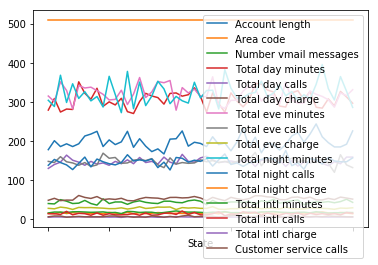

In [4]:
# можно не указывать [columns_to_show]. Тогда функция будем применина ко всем столбцам (кроме by='column_of_interest')
frame.groupby(by='State').max().plot()

#### groupby несколько признаков, агрегирующая ф-ция

Для того, что бы сгруппировать данные по нескольким переменным, используем список с нужными именами:
```py
df.groupby(['group_var_1', 'group_var_2']).count()
```
Обратите внимание, что при такой записи группирующие переменные станут индексами в итоговом dataframe, изучите справку по groupby, чтобы разобраться со всеми тонкостями группировки данных. Также функция `count()` применится ко всем колонкам, что не всегда является желанным результатом. Чтобы применить функцию только к нужной колонке в данных, можно использовать связку  `groupby()` + `agg()`: 
```py
my_stat.groupby('group').agg({'n_users': 'count'})
```

#### groupby несколько признаков: multindex

In [ ]:
frame.groupby(['Total day minutes', 'Total night minutes'])['Customer service calls'].mean()

Такой запрос вернет датафрейм с **multiindex**: т.е. сложной структурой индекса, который задается кортежем те `(Total day minutes, Total night minutes)`.   
Чтобы вызвать конкретную строку, вместо простого указания индекса надо указывать кортеж:
```python 
multi_df = frame.groupby(['gender', 'race'])['Customer service calls'].mean()
multi_df.loc[('female', 'Group A')]
```
запрос вернет конкретную строку на пересечении индексов 'female' и 'Group A'

----

### Сводные таблицы (pd.pivot_table)

По сути это тоже самое, что и groupby (другой чутка синтаксис)

```frame.pivot_table([value1, vlaue2, ...], [index], aggfunc=...)``` где  
`[value1, ...]` -  группы над которыми совершают действие  
`[index]` -  группа по которой вывести даныые  
`aggfunc=...` -  какое действиe: наприм aggfunc=np.sum  **Не всегда работает так. Тогда надо писать *aggfunc='mean'***

In [22]:
frame.pivot_table(['Total day minutes', 'Total night minutes'], ['Customer service calls'], aggfunc=sum).head()

,Total day minutes,Total night minutes
Customer service calls,,
0,126739.3,140946.9
1,211936.3,236393.6
2,134156.1,152518.0
3,78642.8,86780.0
4,30589.2,33050.7


`index` - то что будет по row  
`columns` - то что будет по колонкам  
`values` - численный тип. Сответствует их пересечанию  
`aggfunc` - функция которую применить на values


In [21]:
frame.pivot_table(index = 'Churn',
                  columns = 'International plan',
                  values = 'Customer service calls',
                  aggfunc=np.mean).head(5)

International plan,No,Yes
Churn,,
False,1.456081,1.360215
True,2.476879,1.605839


## numpy

Numpy можно применить, чтобы произвести некоторые действия на колонку целиком. Например:
```python
col = pd.Series[i for i in range(111)] # создали pd.Series колонку по наростающим числам
log_col = np.log(col) # взяли log от каждого значения колонки
```